## Import Package

In [1]:
# Python import library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# Self_define import file
from control import get_single_trial_data


## Process Data

In [2]:
# Call self-defined function to get data we want
data = get_single_trial_data('302', 'p1')

35
Finish getting data for: p1


/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


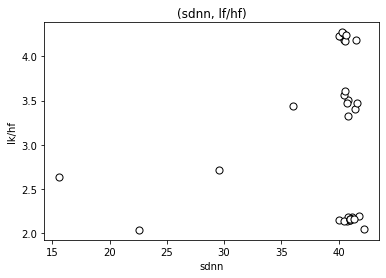

In [6]:
trial = 'p1'
fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.title('(sdnn, lf/hf)')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
# X-axis is sdnn value, Y-axis is lfhf value
plt.scatter(data['sdnn'],data['lfhf'], c='white', marker='o',
   edgecolor='black', s=50 )
fig1.show()


## KMean Clustering and Visualization

In [7]:
count = 2
if trial == 'nw1' or trial == 'nw2':
    count = 1
else:
    count = 1
while count >0:
    km_bia = KMeans(
        n_clusters=2, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km_bia = km_bia.fit_predict(data['sd_lf'])
    if len(data['sd_lf'][y_km_bia == 0]) > len(data['sd_lf'][y_km_bia == 1]):
        data['sd_lf'] = data['sd_lf'][y_km_bia == 0]
    else:
        data['sd_lf'] = data['sd_lf'][y_km_bia == 1]
    count = count - 1
    
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data['sd_lf'])

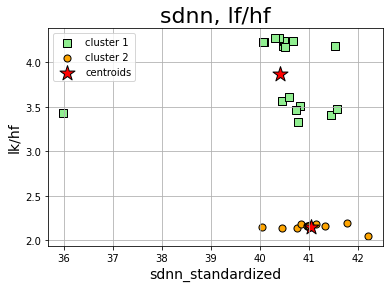

In [14]:
# plot the 2 clusters
plt.scatter(
    data['sd_lf'][y_km == 0, 0],data['sd_lf'][y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data['sd_lf'][y_km == 1, 0], data['sd_lf'][y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title('sdnn, lf/hf', fontsize=22)
plt.xlabel('sdnn_standardized', fontsize=14)
plt.ylabel('lk/hf', fontsize=14)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 3D Data Recollection and Plot

In [6]:
# First cluster data
sd_fq_array = data['sd_lf']
cluster1_z = []
length1 = len(sd_fq_array[y_km == 0, 0]) 
Y1 = np.zeros(shape=(length1,3))
for i in range( length1 ):
    idx = data['3d_dict'][( sd_fq_array[y_km == 0, 0][i], sd_fq_array[y_km == 0, 1][i])]
#     print([sd_fq_array[y_km == 0, 0][i], sd_fq_array[y_km == 0, 1][i] ,idx])
#     print(Y1[i])
    Y1[i] = [sd_fq_array[y_km == 0, 0][i], sd_fq_array[y_km == 0, 1][i] ,idx[1]]
    cluster1_z.append(idx[1])

# Second cluster data
cluster2_z = []
length2 = len(data['sd_lf'][y_km == 1, 0]) 
Y2 = np.zeros(shape=(length2,3))
for i in range( length2 ):
    idx = data['3d_dict'][( data['sd_lf'][y_km == 1, 0][i], data['sd_lf'][y_km == 1, 1][i])]
    Y2[i] = [data['sd_lf'][y_km == 1, 0][i], data['sd_lf'][y_km == 1, 1][i],idx[1] ]
    cluster2_z.append(idx[1])
    


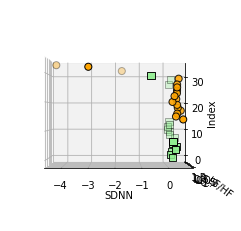

In [7]:
ax = plt.axes(projection='3d')

# Set axis label
ax.set_xlabel('SDNN')
ax.set_ylabel('LF/HF')
ax.set_zlabel('Index')

# Data for three-dimensional scattered points
ax.scatter3D(Y1[:, 0], Y1[:, 1], Y1[:, 2], s=50, 
    marker='s', edgecolor='black',c='lightgreen',
    label='cluster 1')

ax.scatter3D(Y2[:, 0], Y2[:, 1], Y2[:, 2], s=50, 
    marker='o', edgecolor='black',c='orange',
    label='cluster 2')

# Modify following function to rotate
ax.view_init(0, 270)




## Find corresponding threadmill data

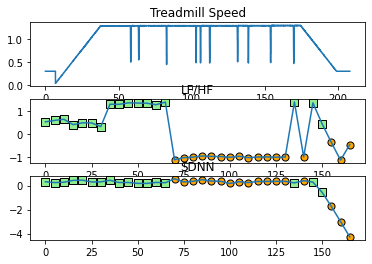

In [8]:
i = 0 #67410
f = 134820
ii= 17500
ff= 32500

num_figures = 3
plt.figure()
plt.subplot(num_figures,1,1)
plt.title('Treadmill Speed')
treadmill_data = data['treadMill']
intervals = data['interval']
plt.plot(treadmill_data.Time, treadmill_data.Speed)
# plt.xlim(0,160)
  
plt.subplot(num_figures,1,2)
plt.title('LF/HF')
length = len(intervals)
#scale = [15+i[0]/1910 for i in intervals[0:-1]]
scale = [i[0]/1925.9258 for i in intervals[0:-1]]
# scale = [i[0]/3500 for i in intervals[0:-1]]
#plt.plot(lf_hf_store,'*')
lfhf_list = data['lfhf']
plt.plot(scale, lfhf_list)

# First cluster in lfhf
scale1 = [scale[i] for i in cluster1_z]
lfhf1 = [lfhf_list[i] for i in cluster1_z]
plt.scatter(
    scale1, lfhf1,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# Second cluster in lfhf
scale2 = [scale[i] for i in cluster2_z]
lfhf2 = [lfhf_list[i] for i in cluster2_z]
plt.scatter(
    scale2, lfhf2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

sdnn_list = data['sdnn']
plt.subplot(num_figures,1,3)
plt.title('SDNN')
plt.plot(scale, sdnn_list)
# First cluster in sdnn
scale1 = [scale[i] for i in cluster1_z]
sdnn1 = [sdnn_list[i] for i in cluster1_z]
plt.scatter(
    scale1, sdnn1,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# Second cluster in sdnn
scale2 = [scale[i] for i in cluster2_z]
sdnn2 = [sdnn_list[i] for i in cluster2_z]
plt.scatter(
    scale2, sdnn2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.show()